# <font color=red> *MACHINE LEARNING - IRIS DATASET* </font>

## <font color=blue> The purpose of this project is to apply different algorithms of Machine Learning Classification </font>

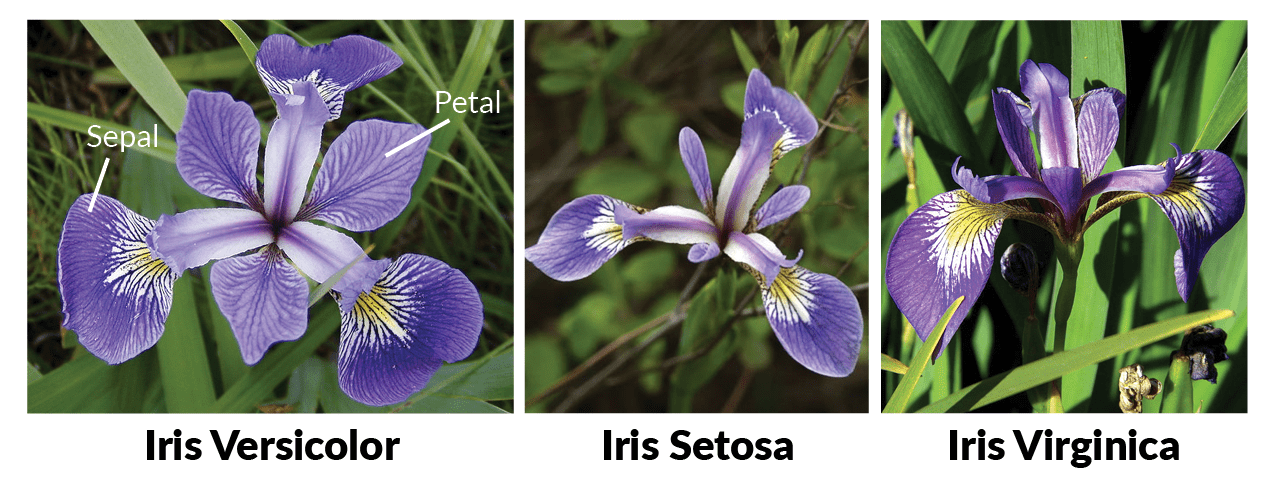

In [337]:
from IPython.display import Image
Image("iris-machinelearning.PNG")

In [338]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold, GridSearchCV, cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, make_scorer, accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [339]:
#loading dataframe
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
df = pd.read_csv(url, names=names)

## 1. Exploratory Data Analysis

In [340]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [341]:
df.shape

(150, 5)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [343]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [344]:
df["species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [345]:
df.groupby("species").agg(["mean","median","std"])

sepal-length                  sepal-width                   \
                        mean median       std        mean median       std   
species                                                                      
Iris-setosa            5.006    5.0  0.352490       3.418    3.4  0.381024   
Iris-versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
Iris-virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

                petal-length                  petal-width                   
                        mean median       std        mean median       std  
species                                                                     
Iris-setosa            1.464   1.50  0.173511       0.244    0.2  0.107210  
Iris-versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
Iris-virginica         5.552   5.55  0.551895       2.026    2.0  0.274650

## 2. Data Visualization

### 2.1 Univariate analysis

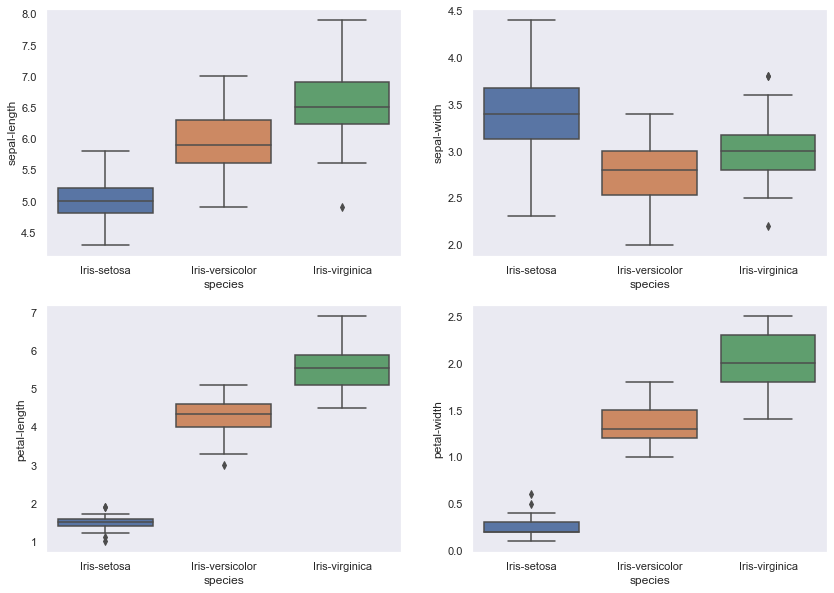

In [346]:
#Plotting box-plots
sns.set(style="dark") 
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal-length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal-width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal-length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal-width',data=df);

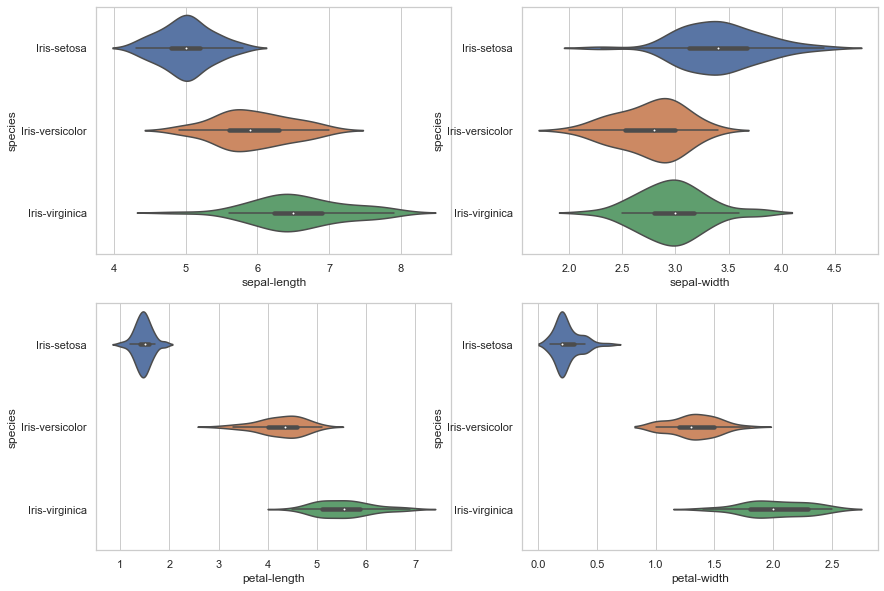

In [347]:
#Plotting Violin plots
sns.set(style="whitegrid")
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.violinplot(x='sepal-length',y='species',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='sepal-width',y='species',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='petal-length',y='species',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='petal-width',y='species',data=df);

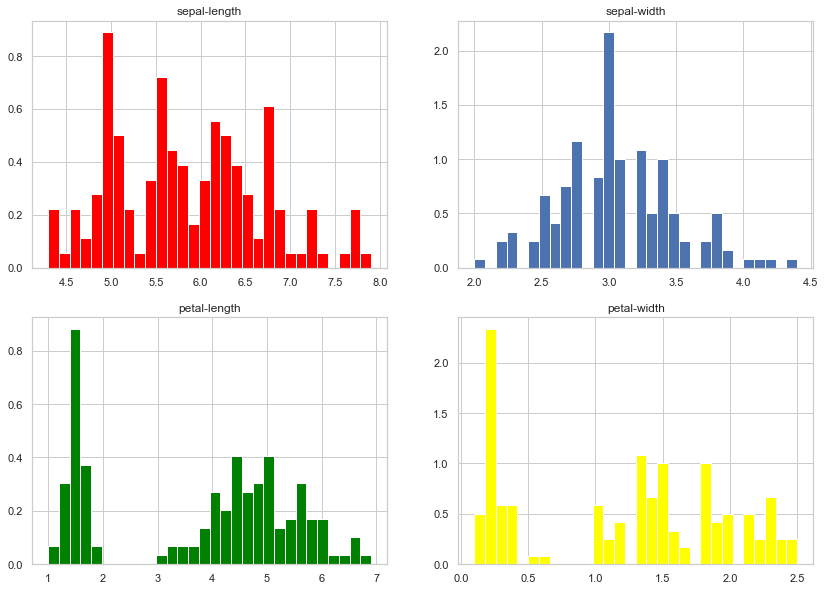

In [348]:
#Plotting the Histograms
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.title('sepal-length')
plt.hist(df["sepal-length"],density=True, bins=30, color="red", label="sepal-length")
plt.subplot(2,2,2)
plt.title('sepal-width')
plt.hist(df["sepal-width"],density=True, bins=30)
plt.subplot(2,2,3)
plt.title('petal-length')
plt.hist(df["petal-length"],density=True, bins=30, color="green")
plt.subplot(2,2,4)
plt.title('petal-width')
plt.hist(df["petal-width"],density=True, bins=30, color="yellow");

### 2.1 Multivariate analysis

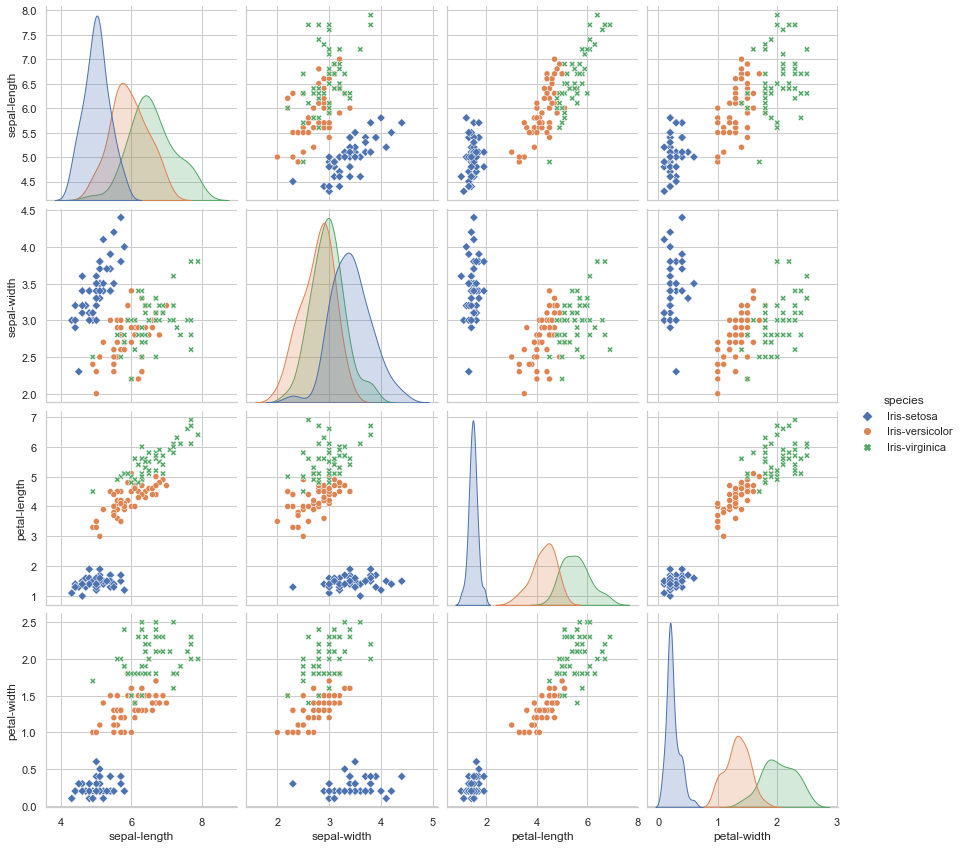

In [349]:
#Plotting pairplot
sns.pairplot(df, hue='species', markers=("D", "o", "X"), height=3);

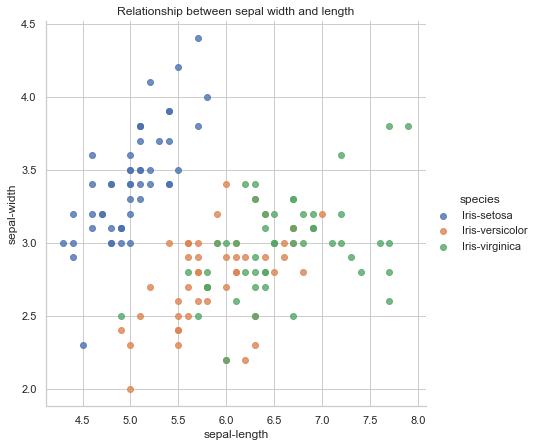

In [350]:
#Plotting scatterplot
sns.lmplot( x="sepal-length", y="sepal-width", data=df, fit_reg=False, hue='species', legend=True, height=6);
plt.title("Relationship between sepal width and length");

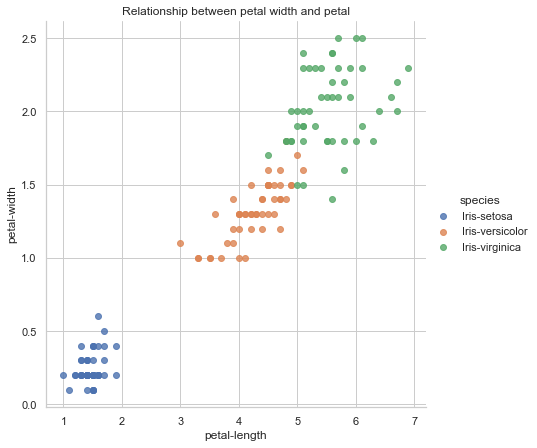

In [351]:
#Plotting scatterplot
sns.lmplot( x="petal-length", y="petal-width", data=df, fit_reg=False, hue='species', legend=True, height=6);
plt.title("Relationship between petal width and petal");

In [352]:
Ss = StandardScaler()
df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']] = Ss.fit_transform(df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']])

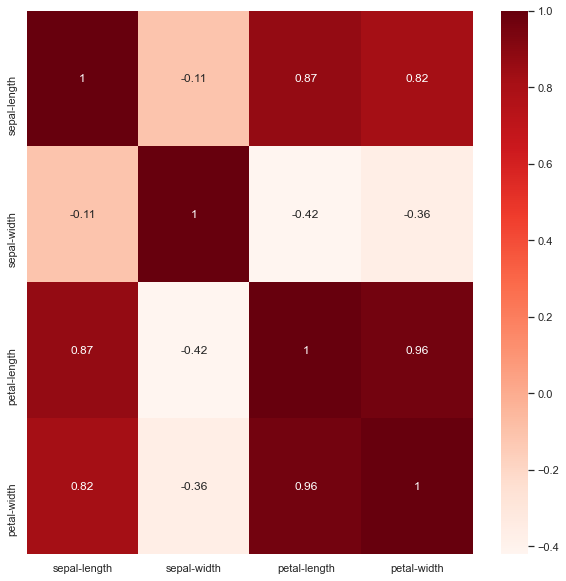

In [353]:
#Plotting Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Reds");

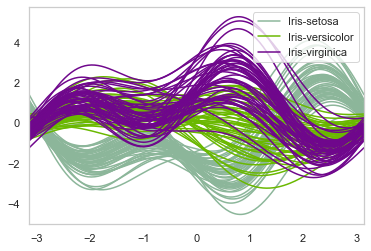

In [354]:
#Plotting Andrews Curves
pd.plotting.andrews_curves(df, 'species');

## 3. Evaluation of different algorithms

In [367]:
df=shuffle(df)

In [368]:
df.head(20)

,sepal-length,sepal-width,petal-length,petal-width,species
100,0.553333,0.569251,1.274550,1.710902,Iris-virginica
78,0.189830,-0.356361,0.421564,0.396172,Iris-versicolor
97,0.432165,-0.356361,0.307833,0.133226,Iris-versicolor
27,-0.779513,1.032057,-1.284407,-1.312977,Iris-setosa
37,-1.143017,0.106445,-1.284407,-1.444450,Iris-setosa
83,0.189830,-0.819166,0.762759,0.527645,Iris-versicolor
122,2.249683,-0.587764,1.672610,1.053537,Iris-virginica
103,0.553333,-0.356361,1.047087,0.790591,Iris-virginica
51,0.674501,0.337848,0.421564,0.396172,Iris-versicolor
61,0.068662,-0.124958,0.250967,0.396172,Iris-versicolor


### 3.1 Creating validation dataset

In [369]:
#Train-Test Split

In [370]:
X= df.loc[:, df.columns != 'species'].values
y= df.loc[:, df.columns == 'species'].values.squeeze()

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [372]:
#Label balance control
label_train, count_train=(np.unique(y_train,return_counts=True))
label_test, count_test=(np.unique(y_test,return_counts=True))
print(count_train,count_test)

[40 40 40] [10 10 10]


### 3.2 Building Models

In [373]:
#Cross Validation DecisionTree
score_fnc= accuracy_score
param_grid= {"max_depth":np.logspace(0.5, 2, 20).astype(int),"min_samples_leaf":np.logspace(0.5, 1.5, 10).astype(int)}

val_cv= KFold(n_splits=5 , shuffle=True)
test_cv= KFold(n_splits=5 , shuffle=True)
model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
model_selection= GridSearchCV(estimator=model, param_grid=param_grid , scoring=make_scorer(score_fnc), cv=val_cv)
test_score= cross_val_score(estimator=model_selection,cv=test_cv, scoring=make_scorer(score_fnc), X=X, y=y, verbose=True)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished


In [374]:
test_score , np.mean(test_score)

(array([0.93333333, 1.        , 0.96666667, 0.93333333, 1.        ]),
 0.9666666666666666)

In [375]:
models={}
Decision_Tree = {'Decision_Tree':np.mean(test_score)}
models.update(Decision_Tree)

In [376]:
#Cross Validation KNN
param_grid= {"n_neighbors":np.arange(2,22)}

val_cv= KFold(n_splits=5 , shuffle=True)
test_cv= KFold(n_splits=5 , shuffle=True)
model = KNeighborsClassifier()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid , scoring=make_scorer(score_fnc), cv=val_cv)
test_score= cross_val_score(estimator=model_selection,cv=test_cv, scoring=make_scorer(score_fnc), X=X, y=y, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [377]:
test_score , np.mean(test_score)

(array([1.        , 0.96666667, 1.        , 0.93333333, 0.86666667]),
 0.9533333333333335)

In [378]:
KNNeighbors = {'KNNeighbors':np.mean(test_score)}
models.update(KNNeighbors)

In [379]:
#Cross Validation Logistic Regression
param_grid= {"penalty": ["l1","l2"],'C': [0.01, 0.1, 1, 10, 100]}
val_cv= KFold(n_splits=5 , shuffle=True)
test_cv= KFold(n_splits=5 , shuffle=True)
model = LogisticRegression()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid , scoring=make_scorer(score_fnc), cv=val_cv)
test_score= cross_val_score(estimator=model_selection,cv=test_cv, scoring=make_scorer(score_fnc), X=X, y=y,verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [380]:
test_score , np.mean(test_score)

(array([1.        , 0.93333333, 1.        , 0.96666667, 0.96666667]),
 0.9733333333333334)

In [381]:
LogisticRegression = {'LogisticRegression':np.mean(test_score)}
models.update(LogisticRegression)

In [382]:
#Cross Validation SVM Kernel linear
param_grid= {'kernel':['linear'],'C': [0.01, 0.1, 1, 10, 100]}
val_cv= KFold(n_splits=5, shuffle=True)
test_cv= KFold(n_splits=5, shuffle=True)
model = svm.SVC()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(score_fnc), cv=val_cv)
test_score= cross_val_score(estimator=model_selection,cv=test_cv, scoring=make_scorer(score_fnc), X=X, y=y, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [383]:
test_score , np.mean(test_score)

(array([1.        , 0.9       , 0.96666667, 0.93333333, 0.96666667]),
 0.9533333333333334)

In [384]:
#Cross Validation SVM Kernel Poly
param_grid= {'kernel':['poly'],'C': [0.01, 0.1, 1, 10, 100], 'degree': [2,3,4]}
val_cv= KFold(n_splits=5, shuffle=True)
test_cv= KFold(n_splits=5, shuffle=True)
model = svm.SVC()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(score_fnc), cv=val_cv)
test_score= cross_val_score(estimator=model_selection,cv=test_cv, scoring=make_scorer(score_fnc), X=X, y=y, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [385]:
test_score , np.mean(test_score)

(array([0.93333333, 0.96666667, 0.9       , 1.        , 0.96666667]),
 0.9533333333333334)

In [388]:
#Cross Validation SVM Kernel RBF
param_grid= {'kernel':['rbf'],'gamma': [0.001, 0.01, 0.1, 1],'C': [0.01, 0.1, 1, 10, 100]}
val_cv= KFold(n_splits=5, shuffle=True)
model = svm.SVC()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(score_fnc), cv=val_cv)
test_score= cross_val_score(estimator=model_selection,cv=test_cv, scoring=make_scorer(score_fnc), X=X, y=y, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [389]:
test_score , np.mean(test_score)

(array([0.96666667, 0.96666667, 0.9       , 1.        , 0.96666667]), 0.96)

In [390]:
SupportVectorMachine = {'SupportVectorMachine':np.mean(test_score)}
models.update(SupportVectorMachine)

In [391]:
#Linear Discriminat Analysis
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Linear Discriminant Analysis is',accuracy_score(prediction,y_test))
result=accuracy_score(prediction,y_test)
LinearDiscriminantAnalysis_ = {'LinearDiscriminantAnalysis_':result}
models.update(LinearDiscriminantAnalysis_)

The accuracy of the Linear Discriminant Analysis is 1.0


In [392]:
#GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the GaussianNB is',accuracy_score(prediction,y_test))
result=accuracy_score(prediction,y_test)
GaussianNaiveB = {'GaussianNaiveB':result}
models.update(GaussianNaiveB)

The accuracy of the GaussianNB is 1.0


In [393]:
for key, value in models.items():
    print(key, ' : ', round(value,4))

Decision_Tree  :  0.9667
KNNeighbors  :  0.9533
LogisticRegression  :  0.9733
SupportVectorMachine  :  0.96
LinearDiscriminantAnalysis_  :  1.0
GaussianNaiveB  :  1.0


### :)